# CNN's with the Cats vs Dogs Dataset

In [1]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

In [2]:
!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip" \
    -O "/tmp/cats-and-dogs.zip"

local_zip = '/tmp/cats-and-dogs.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

--2023-01-25 01:03:09--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 184.86.252.239, 2600:1407:7800:295::317f, 2600:1407:7800:2ab::317f
Connecting to download.microsoft.com (download.microsoft.com)|184.86.252.239|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.67M   125MB/s    in 7.9s    

2023-01-25 01:03:18 (99.2 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824887076/824887076]



In [3]:
source_path = '/tmp/PetImages'

source_path_dogs = os.path.join(source_path, 'Dog')
source_path_cats = os.path.join(source_path, 'Cat')
!find /tmp/PetImages/ -type f ! -name "*.jpg" -exec rm {} +

print(f"There are {len(os.listdir(source_path_dogs))} images of dogs.")
print(f"There are {len(os.listdir(source_path_cats))} images of cats.")

There are 12500 images of dogs.
There are 12500 images of cats.


In [5]:
# Define root directory
root_dir = '/tmp/cats-v-dogs'
sub_dir_training = 'training'
sub_dir_training_cats = 'cats'
sub_dir_training_dogs = 'dogs'

sub_dir_testing = 'validation'
sub_dir_testing_cats = 'cats'
sub_dir_testing_dogs = 'dogs'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)


def create_train_val_dirs(root_path):

  try:
    os.makedirs(os.path.join(root_dir,sub_dir_training))
    os.makedirs(os.path.join(root_dir,sub_dir_training,sub_dir_training_cats))
    os.makedirs(os.path.join(root_dir,sub_dir_training,sub_dir_training_dogs))
    os.makedirs(os.path.join(root_dir,sub_dir_testing))
    os.makedirs(os.path.join(root_dir,sub_dir_testing,sub_dir_testing_cats))
    os.makedirs(os.path.join(root_dir,sub_dir_testing,sub_dir_testing_dogs))
  except:
    print('There was some error')

  
try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("Unexpected")

In [6]:
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/tmp/cats-v-dogs/training
/tmp/cats-v-dogs/validation
/tmp/cats-v-dogs/training/dogs
/tmp/cats-v-dogs/training/cats
/tmp/cats-v-dogs/validation/dogs
/tmp/cats-v-dogs/validation/cats


In [7]:

def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
  
  all_files=[]

  for file_name in os.listdir(SOURCE_DIR):
    file_path = SOURCE_DIR + file_name

    if os.path.getsize(file_path):
      all_files.append(file_name)
    else:
      print('{} is zero length, so ignoring'.format(file_name))

  n_files = len(all_files)
  split_point = int(n_files * SPLIT_SIZE)

  shuffle = random.sample(all_files, n_files)

  train_set =  shuffle[:split_point]
  test_set = shuffle[split_point:]

  for file_name in train_set:
    copyfile(SOURCE_DIR + file_name, TRAINING_DIR + file_name)

  for file_name in test_set:
    copyfile(SOURCE_DIR + file_name, VALIDATION_DIR + file_name)

In [8]:
# Define paths
CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"

TRAINING_DIR = "/tmp/cats-v-dogs/training/"
VALIDATION_DIR = "/tmp/cats-v-dogs/validation/"

TRAINING_CATS_DIR = os.path.join(TRAINING_DIR, "cats/")
VALIDATION_CATS_DIR = os.path.join(VALIDATION_DIR, "cats/")

TRAINING_DOGS_DIR = os.path.join(TRAINING_DIR, "dogs/")
VALIDATION_DOGS_DIR = os.path.join(VALIDATION_DIR, "dogs/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_CATS_DIR)) > 0:
  for file in os.scandir(TRAINING_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_DOGS_DIR)) > 0:
  for file in os.scandir(TRAINING_DOGS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_CATS_DIR)) > 0:
  for file in os.scandir(VALIDATION_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_DOGS_DIR)) > 0:
  for file in os.scandir(VALIDATION_DOGS_DIR):
    os.remove(file.path)

# Define proportion of images used for training
split_size = .9

split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, VALIDATION_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, VALIDATION_DOGS_DIR, split_size)

print(f"\n\nOriginal cat's directory has {len(os.listdir(CAT_SOURCE_DIR))} images")
print(f"Original dog's directory has {len(os.listdir(DOG_SOURCE_DIR))} images\n")

# Training and validation splits
print(f"There are {len(os.listdir(TRAINING_CATS_DIR))} images of cats for training")
print(f"There are {len(os.listdir(TRAINING_DOGS_DIR))} images of dogs for training")
print(f"There are {len(os.listdir(VALIDATION_CATS_DIR))} images of cats for validation")
print(f"There are {len(os.listdir(VALIDATION_DOGS_DIR))} images of dogs for validation")

666.jpg is zero length, so ignoring
11702.jpg is zero length, so ignoring


Original cat's directory has 12500 images
Original dog's directory has 12500 images

There are 11249 images of cats for training
There are 11249 images of dogs for training
There are 1250 images of cats for validation
There are 1250 images of dogs for validation


In [9]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):

  # Instantiate the ImageDataGenerator class 
  train_datagen = ImageDataGenerator(rescale= 1.0/255)
  
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=64,
                                                      class_mode='binary',
                                                      target_size=(150, 150))

  # Instantiate the ImageDataGenerator class
  validation_datagen = ImageDataGenerator(rescale=1.0/255)

  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=64,
                                                                class_mode='binary',
                                                                target_size=(150, 150))
  return train_generator, validation_generator

In [10]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [13]:
from tensorflow.keras.optimizers import RMSprop

def create_model():
  model = tf.keras.models.Sequential([ 
          tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
          tf.keras.layers.MaxPooling2D(2,2),
          tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
          tf.keras.layers.MaxPooling2D(2,2),
          tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150,150,3)),
          tf.keras.layers.MaxPooling2D(2,2),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(512, activation = 'relu'),
          tf.keras.layers.Dense(1, activation = 'sigmoid')
  ])

  
  model.compile(optimizer=RMSprop(learning_rate = 0.001),
                loss='binary_crossentropy',
                metrics=['accuracy']) 

  return model


In [14]:
model = create_model()
history = model.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/15
231/352 [==================>...........] - ETA: 23s - loss: 0.7197 - accuracy: 0.6091

/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:767: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:767: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:767: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:767: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:767: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 283
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:767: UserWar

352/352 [==============================] - 83s 211ms/step - loss: 0.6687 - accuracy: 0.6427 - val_loss: 0.5535 - val_accuracy: 0.7148
Epoch 2/15
352/352 [==============================] - 76s 214ms/step - loss: 0.4910 - accuracy: 0.7611 - val_loss: 0.4839 - val_accuracy: 0.7688
Epoch 3/15
352/352 [==============================] - 74s 209ms/step - loss: 0.4163 - accuracy: 0.8082 - val_loss: 0.4146 - val_accuracy: 0.8112
Epoch 4/15
352/352 [==============================] - 73s 208ms/step - loss: 0.3483 - accuracy: 0.8467 - val_loss: 0.4532 - val_accuracy: 0.8036
Epoch 5/15
352/352 [==============================] - 75s 213ms/step - loss: 0.2869 - accuracy: 0.8772 - val_loss: 0.4131 - val_accuracy: 0.8376
Epoch 6/15
352/352 [==============================] - 73s 208ms/step - loss: 0.2202 - accuracy: 0.9089 - val_loss: 0.4560 - val_accuracy: 0.8432
Epoch 7/15
352/352 [==============================] - 73s 208ms/step - loss: 0.1631 - accuracy: 0.9351 - val_loss: 0.5023 - val_accuracy: 0.8

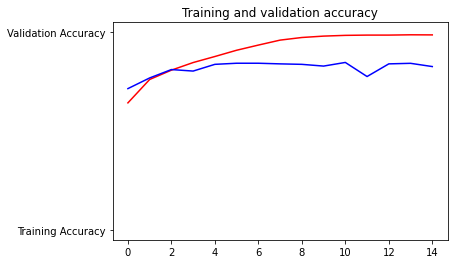

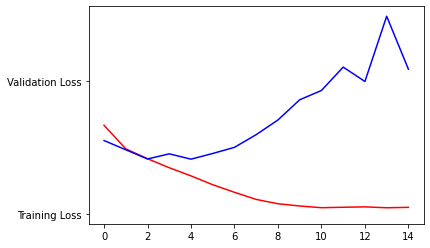

In [15]:

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [16]:
def download_history():
  import pickle
  from google.colab import files

  with open('history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

  files.download('history.pkl')

download_history()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>